In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

In [15]:
train = pd.read_csv('train.csv')

In [16]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
train2 = pd.get_dummies(train, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Type'])

In [18]:
train2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Fat_Content_LF,...,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,Medium,3735.1380,0,...,0,0,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,443.4228,0,...,1,0,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,Medium,2097.2700,0,...,0,0,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,732.3800,0,...,1,0,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,High,994.7052,0,...,0,0,0,0,0,1,0,1,0,0


In [19]:
train_data=pd.DataFrame(train2,columns=['Item_Weight','Item_Visibility','Item_MRP','Item_Fat_Content_Low Fat','Item_Fat_Content_Regular','Outlet_Location_Type_Tier 1','Outlet_Location_Type_Tier 2','Outlet_Location_Type_Tier 3','Outlet_Type_Grocery Store','Outlet_Type_Supermarket Type1','Outlet_Type_Supermarket Type2','Outlet_Type_Supermarket Type3','Item_Outlet_Sales'])

In [20]:
train_data.isnull().sum()

Item_Weight                      1463
Item_Visibility                     0
Item_MRP                            0
Item_Fat_Content_Low Fat            0
Item_Fat_Content_Regular            0
Outlet_Location_Type_Tier 1         0
Outlet_Location_Type_Tier 2         0
Outlet_Location_Type_Tier 3         0
Outlet_Type_Grocery Store           0
Outlet_Type_Supermarket Type1       0
Outlet_Type_Supermarket Type2       0
Outlet_Type_Supermarket Type3       0
Item_Outlet_Sales                   0
dtype: int64

In [21]:
train_data['Item_Weight']=train_data['Item_Weight'].fillna(train_data['Item_Weight'].median())

In [22]:
train_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1,0,1,0,0,0,1,0,0,3735.1380
1,5.92,0.019278,48.2692,0,1,0,0,1,0,0,1,0,443.4228
2,17.50,0.016760,141.6180,1,0,1,0,0,0,1,0,0,2097.2700
3,19.20,0.000000,182.0950,0,1,0,0,1,1,0,0,0,732.3800
4,8.93,0.000000,53.8614,1,0,0,0,1,0,1,0,0,994.7052


In [23]:
y = train_data['Item_Outlet_Sales']
X = train_data.drop(['Item_Outlet_Sales'], axis=1)

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=0.25,random_state=0)

In [68]:
import xgboost

regressor = xgboost.XGBRegressor(base_score=0.25, 
                                 booster='gbtree', 
                                 learning_rate=0.05, 
                                 max_delta_step=0,
                                 max_depth=2, 
                                 min_child_weight=1, 
                                 n_estimators=900,
                                 verbosity=1)

In [69]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=1)

In [70]:
y_preds_xgb=regressor.predict(X_test)
xgb=np.sqrt(mean_squared_error(y_preds_xgb,y_test))
print('RMSE for XGB Regression:{0:.2f}'.format(xgb))

RMSE for XGB Regression:1121.79


Text(0.5, 1, 'XGB Regression \n RMSE: 1121.79')

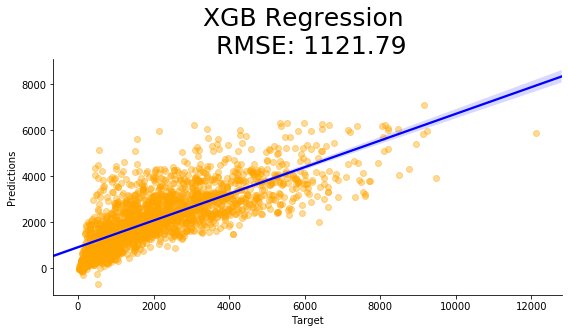

In [35]:
reg_xgb_df=pd.DataFrame()
reg_xgb_df['Target']=y_test
reg_xgb_df['Predictions']=y_preds_xgb

sns.lmplot('Target','Predictions',data=reg_xgb_df,height=4,aspect=2,line_kws={'color':'blue'},scatter_kws={'alpha':0.4,'color':'orange'})
plt.title('XGB Regression \n RMSE: {0:.2f}'.format(xgb),size=25)

In [75]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=25)
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                    weights='uniform')

In [76]:
y_preds_knn=knn.predict(X_test)
knn_=np.sqrt(mean_squared_error(y_preds_knn,y_test))
print('RMSE for KNN Regression:{0:.2f}'.format(knn_))

RMSE for KNN Regression:1379.27


In [77]:
test = pd.read_csv('test.csv')

In [78]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [79]:
test2 = pd.get_dummies(test, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Type'])

In [80]:
test_data=pd.DataFrame(test2,columns=['Item_Weight','Item_Visibility','Item_MRP','Item_Fat_Content_Low Fat','Item_Fat_Content_Regular','Outlet_Location_Type_Tier 1','Outlet_Location_Type_Tier 2','Outlet_Location_Type_Tier 3','Outlet_Type_Grocery Store','Outlet_Type_Supermarket Type1','Outlet_Type_Supermarket Type2','Outlet_Type_Supermarket Type3'])

In [81]:
test_data['Item_Weight']=test_data['Item_Weight'].fillna(test_data['Item_Weight'].median())

In [82]:
test_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0.007565,107.8622,1,0,1,0,0,0,1,0,0
1,8.300,0.038428,87.3198,0,0,0,1,0,0,1,0,0
2,14.600,0.099575,241.7538,1,0,0,0,1,1,0,0,0
3,7.315,0.015388,155.0340,1,0,0,1,0,0,1,0,0
4,12.500,0.118599,234.2300,0,1,0,0,1,0,0,0,1


In [83]:
predictions = knn.predict(test_data)
final = pd.DataFrame({"Item_Identifier":test["Item_Identifier"],"Outlet_Identifier":test["Outlet_Identifier"],"Item_Outlet_Sales":abs(predictions)})
final.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1709.854296
1,FDW14,OUT017,1472.962656
2,NCN55,OUT010,3390.147072
3,FDQ58,OUT017,2216.394936
4,FDY38,OUT027,4002.629808


In [84]:
final.to_csv('Submission_7.csv',index=False,header=True)